In [10]:
# imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
pd.read_csv('hyperp.csv', delimiter = ',')

,best_acc,learning_rate,hyper,batch_size,best_loss,filters_1,filters_2,full_hidd_1,full_hidd_2,ksize_1,ksize_2,no_epochs
0,0.6085,0.001,6,256,1.124841,64,96,125,125,5,5,18
1,0.6002,0.001,5,128,1.142996,32,64,100,125,3,5,20
2,0.5978,0.001,0,32,1.147990,32,96,100,80,3,4,19
3,0.5903,0.001,25,64,1.196584,64,96,100,125,3,3,23
4,0.5806,0.001,3,256,1.192041,32,48,60,125,3,3,24
5,0.5749,0.003,2,32,1.211263,16,32,60,100,5,4,35
6,0.5735,0.001,10,64,1.226173,32,96,60,100,3,3,20
7,0.5606,0.003,18,64,1.266603,32,64,60,100,5,4,21
8,0.5598,0.003,12,256,1.247521,8,32,125,80,5,3,30
9,0.5589,0.003,26,64,1.245890,32,48,125,80,4,5,18


No handles with labels found to put in legend.


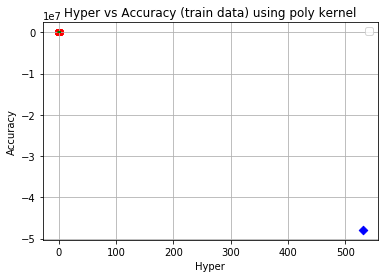

No handles with labels found to put in legend.


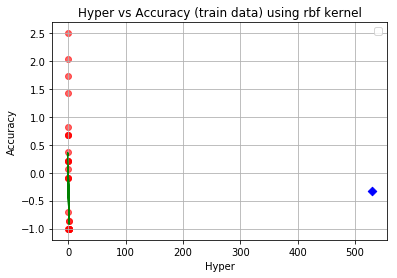

In [12]:
# importing dataset
dataset = pd.read_csv('hyperp.csv')
x = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values

# reshape x and y because they just have one feature
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# feature scaling
from sklearn.preprocessing import StandardScaler
standardscaler_x = StandardScaler()
x = standardscaler_x.fit_transform(x)
standardscaler_y = StandardScaler()
y = standardscaler_y.fit_transform(y)

# reshape to 1d array, necessary for model.
y = y.reshape(len(y),)

# fittign SVR model to the data using POLY kernel
from sklearn.svm import SVR
regressor = SVR(kernel='poly')
regressor = regressor.fit(x,y)

# scaling test data for prediction
test = np.zeros(1) # we are testing just one value
test[0]= 6.5
test = test.reshape(1,1) # reshape to 2D array!
test = standardscaler_x.transform(test) # rescaling test data like train data

# making prediction
y_pred = regressor.predict(test)

# inver scalingy y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Hyper vs Accuracy (train data) using poly kernel')
plt.xlabel('Hyper')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


#################################
# fitting data with SVR model with RBF kernel
regressor2 = SVR(kernel='rbf')
regressor2 = regressor2.fit(x,y)

# making prediction
y_pred = regressor2.predict(test)

# inver scalingy y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor2.predict(x),color='green')
plt.title('Hyper vs Accuracy (train data) using rbf kernel')
plt.xlabel('Hyper')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
